### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from scipy import stats  # Add this import statement
warnings.filterwarnings('ignore')
import matplotlib.colors as plt_colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
#import plotly.express as px  # Uncomment for later
#import plotly.graph_objects as go # Uncomment for later
from numpy import nan
from numpy import isnan
import random
random.seed(1234567)

from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split                
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

C:\Users\Owner\AppData\Local\Temp\ipykernel_5220\3650819706.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Load Data

In [4]:
df = pd.read_csv("HackathonData2024 (2).csv")                  # load the comma delimited data file
df = df.iloc[:,:]                           # copy all rows and columns 1 through 8, note 0 column is removed

### Functions

The following functions will be used in the workflow.

In [5]:
# PLOT FUNCTION, X FUNCTION, Y FUNCTION...

### Basic Data Checking and Visualization

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Well ID,348.0,1.800345e+02,1.031601e+02,1.000000,9.150000e+01,1.805000e+02,2.692500e+02,3.560000e+02
Avg Pump Difference,333.0,2.246405e+01,2.432724e+01,-12.690000,3.860000e+00,1.737000e+01,3.433000e+01,1.172600e+02
Lateral Length,348.0,1.111523e+04,2.408755e+03,2300.000000,1.000000e+04,1.030000e+04,1.270000e+04,1.820000e+04
TVD,344.0,9.082369e+03,8.542595e+02,7345.000000,8.340000e+03,8.912500e+03,9.968750e+03,1.067500e+04
DELAYED,348.0,7.183908e-01,4.504314e-01,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
BOUND_CODE,348.0,9.893037e+06,2.814065e+06,1110.000000,1.000100e+07,1.101100e+07,1.111100e+07,1.111111e+07
PARENT_CODEV_1050_WELL_COUNT,348.0,3.218391e+00,2.062009e+00,0.000000,2.000000e+00,3.000000e+00,4.000000e+00,1.100000e+01
PARENT_IN_ZONE_MIN_HYPOT,259.0,1.495463e+03,7.885431e+02,237.000000,7.680000e+02,1.225000e+03,2.300000e+03,2.854000e+03
PARENT_OUT_ZONE_MIN_HYPOT,318.0,1.299242e+03,7.400094e+02,151.000000,7.745000e+02,1.096000e+03,1.832750e+03,2.925000e+03
PARENT_IN_ZONE_MIN_MAP_DIST,259.0,1.473718e+03,7.966494e+02,35.000000,7.650000e+02,1.217000e+03,2.292000e+03,2.820000e+03


count    333.000000
mean      22.464054
std       24.327237
min      -12.690000
25%        3.860000
50%       17.370000
75%       34.330000
max      117.260000
Name: Avg Pump Difference, dtype: float64


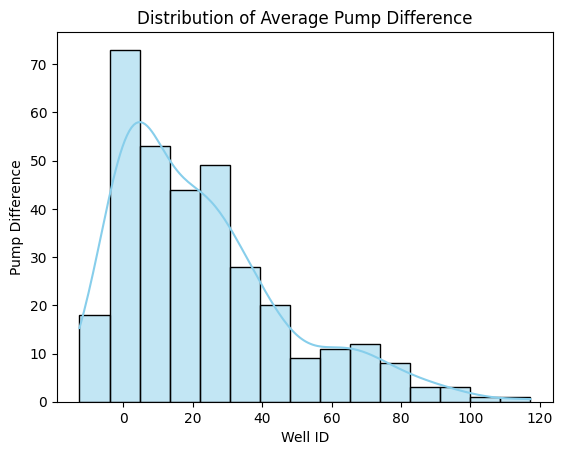

In [7]:
summary_stats = df['Avg Pump Difference'].describe()
print(summary_stats)
sns.histplot(df['Avg Pump Difference'], kde=True, color='skyblue')
plt.title('Distribution of Average Pump Difference')
plt.xlabel('Well ID')
plt.ylabel('Pump Difference')
plt.show()

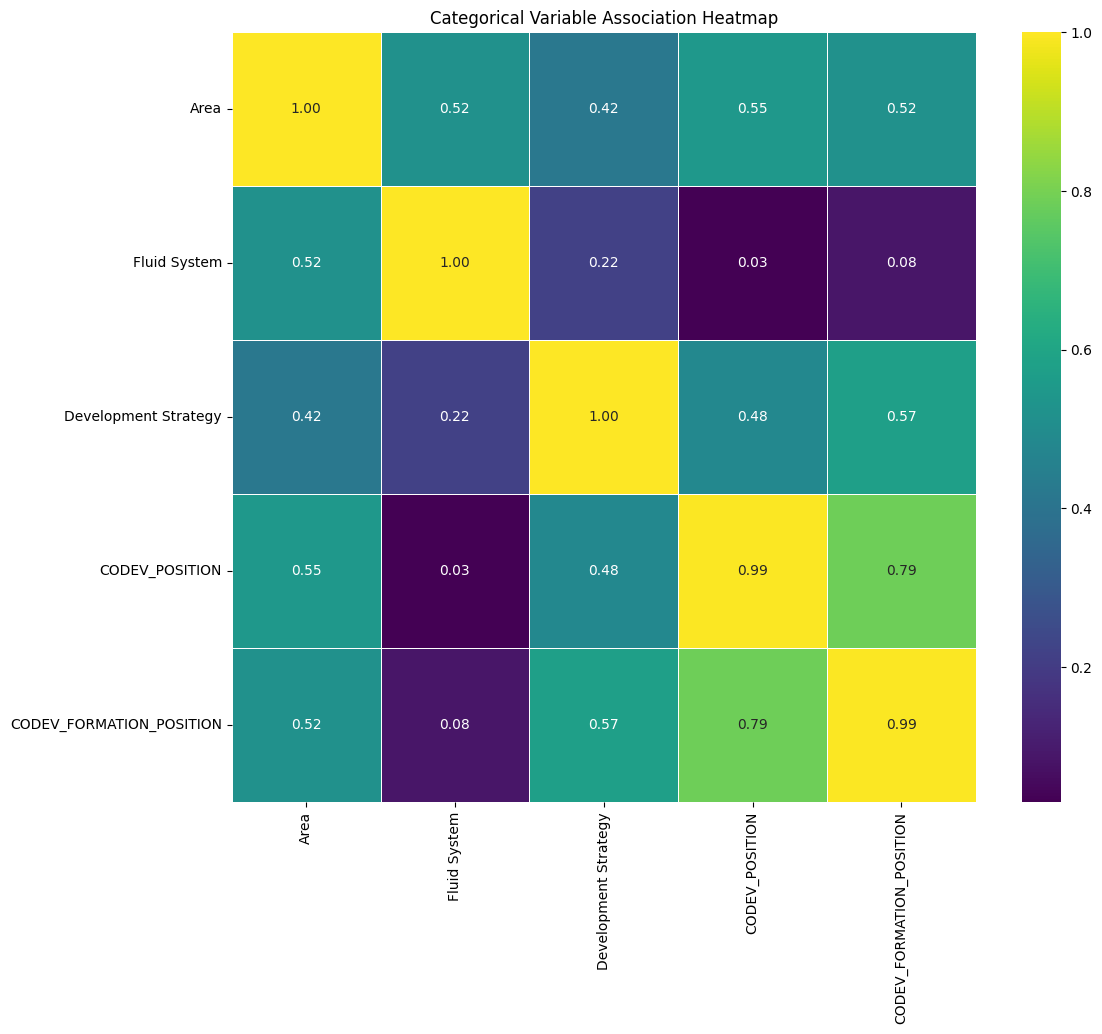

In [9]:
# Select only the categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category'])

# Create a matrix of correlation values
correlation_matrix = pd.DataFrame(index=categorical_columns.columns, columns=categorical_columns.columns)

for col1 in categorical_columns.columns:
    for col2 in categorical_columns.columns:
        cross_tab = pd.crosstab(categorical_columns[col1], categorical_columns[col2])
        chi2, _, _, _ = stats.chi2_contingency(cross_tab)
        correlation_matrix.loc[col1, col2] = np.sqrt(chi2 / (cross_tab.sum().sum() * (min(cross_tab.shape) - 1)))

# Convert to numeric format
correlation_matrix = correlation_matrix.apply(pd.to_numeric)

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)

# Add labels and title
plt.title('Categorical Variable Association Heatmap')

# Show the plot
plt.show()

In [11]:
# find the unique values of all object string columns 5
area_uq = df['Area'].unique()
fluid_uq = df['Fluid System'].unique()
CODEV_uq = df['CODEV_POSITION'].unique()
CODEV_FORMATION_uq = df['CODEV_FORMATION_POSITION'].unique()
dev_strat_uq = df['Development Strategy'].unique()
print('AREA UNIQUE', area_uq)
print('FLUID SYS UQ', fluid_uq)
print('CODEV POS UQ', CODEV_uq)
print('CODEV_FORM_UQ', CODEV_FORMATION_uq)
print('DEV STRAT UQ', dev_strat_uq)

AREA UNIQUE ['Acadia' 'Arches' 'Badlands' 'Big Bend' 'Canyonlands' 'Carlsbad Caverns'
 'Crater Lake' 'Denali' 'Dry Tortugas' 'Everglades' 'Glacier'
 'Grand Canyon' 'Grand Teton' 'Great Basin' 'Great Sand Dunes'
 'Great Smoky Mountains' 'Guadalupe Mountains' 'Hot Springs' 'Joshua Tree'
 'Kings Canyon' 'Mammoth Cave' 'Lake Clark' 'Mount Rainier'
 'North Cascades' 'Olympic' 'Petrified Forest' 'Redwood' 'Rocky Mountain'
 'Sequoia' 'Yellowstone' 'Yosemite']
FLUID SYS UQ ['Campbell' 'Young' 'Williams' nan]
CODEV POS UQ ['Edge' 'Middle']
CODEV_FORM_UQ ['Edge' 'Middle']
DEV STRAT UQ ['Coke' 'Orange Crush' 'Mountain Dew' 'Sprite' 'Dr Pepper' 'Pepsi'
 'Pibb Extra']


# Feature Engineering

### Feature Imputation

Looking for how many features are missing values, and what percent and count of these values are missing

In [12]:
empty = pd.DataFrame(columns=["Feature", "% Complete", "Missing Count"])
nans_1 = df.isnull().sum(axis=0).tolist()
for feature in range(0, len(df.columns)):
    empty.loc[feature, "Feature"] = df.columns[feature]
    empty.loc[feature, "% Complete"] = (1 - nans_1[feature] / len(df.index)) * 100
    empty.loc[feature, "Missing Count"] = nans_1[feature]
empty

,Feature,% Complete,Missing Count
0,Well ID,100.0,0
1,Avg Pump Difference,95.689655,15
2,Area,100.0,0
3,Lateral Length,100.0,0
4,Fluid System,96.83908,11
5,TVD,98.850575,4
6,Development Strategy,100.0,0
7,DELAYED,100.0,0
8,BOUND_CODE,100.0,0
9,CODEV_POSITION,100.0,0


### Impute values

The only categorical value of the 5 that we are missing is fluid system, and we can see above that we are only missing 11 values, which we felt was too small to run a machine learning model to determine, so instead we manually inferred these values:

In [13]:
missing_row_indices = [316, 335, 337, 340, 342, 343, 344, 345, 347, 348, 349]
missing_row_indices = [i-2 for i in missing_row_indices]
inferred_vals = ['William','Young', 'Young',
                    'Campbell', 'William', 'William', 'Campbell', 
                    'Campbell', 'William', 'Campbell', 'William']
df.loc[missing_row_indices, 'Fluid System'] = inferred_vals

#### Impute Parent values missing with 9999 or 0 respectively because they are nonexistent parent wells

In [14]:
df['PARENT_CODEV_1050_WELL_COUNT'] = df['PARENT_CODEV_1050_WELL_COUNT'].fillna(0)
df['PARENT_IN_ZONE_MIN_HYPOT'] = df['PARENT_IN_ZONE_MIN_HYPOT'].fillna(9999)
df['PARENT_OUT_ZONE_MIN_HYPOT'] = df['PARENT_OUT_ZONE_MIN_HYPOT'].fillna(9999)
df['PARENT_IN_ZONE_MIN_MAP_DIST'] = df['PARENT_IN_ZONE_MIN_MAP_DIST'].fillna(9999)
df['PARENT_OUT_ZONE_MIN_MAP_DIST'] = df['PARENT_OUT_ZONE_MIN_MAP_DIST'].fillna(9999)
df['PARENT_1050_AVG_WELL_AGE'] = df['PARENT_1050_AVG_WELL_AGE'].fillna(0)
df['PARENT_1050_MEDIAN_WELL_AGE'] = df['PARENT_1050_MEDIAN_WELL_AGE'].fillna(0)
df['PARENT_1050_WELL_COUNT'] = df['PARENT_1050_WELL_COUNT'].fillna(0)
df['PARENT_3000_AVG_HYPOT_DIST'] = df['PARENT_3000_AVG_HYPOT_DIST'].fillna(9999)
df['PARENT_3000_AVG_MAP_DIST'] = df['PARENT_3000_AVG_MAP_DIST'].fillna(9999)
df['PARENT_3000_AVG_TVD_DIST'] = df['PARENT_3000_AVG_TVD_DIST'].fillna(9999)
df['PARENT_3000_AVG_WELL_AGE'] = df['PARENT_3000_AVG_WELL_AGE'].fillna(0)
df['PARENT_3000_MEDIAN_WELL_AGE'] = df['PARENT_3000_MEDIAN_WELL_AGE'].fillna(0)
df['PARENT_3000_WELL_COUNT'] = df['PARENT_3000_WELL_COUNT'].fillna(0)
df['CODEV_IN_ZONE_MIN_HYPOT'] = df['CODEV_IN_ZONE_MIN_HYPOT'].fillna(9999)
df['CODEV_OUT_ZONE_MIN_HYPOT'] = df['CODEV_OUT_ZONE_MIN_HYPOT'].fillna(9999)
df['CODEV_IN_ZONE_MIN_MAP_DIST'] = df['CODEV_IN_ZONE_MIN_MAP_DIST'].fillna(9999)
df['CODEV_1050_WELL_COUNT'] = df['CODEV_1050_WELL_COUNT'].fillna(0)
df['CODEV_3000_AVG_HYPOT_DIST'] = df['CODEV_3000_AVG_HYPOT_DIST'].fillna(9999)
df['CODEV_3000_AVG_MAP_DIST'] = df['CODEV_3000_AVG_MAP_DIST'].fillna(9999)
df['CODEV_3000_AVG_TVD_DIST'] = df['CODEV_3000_AVG_TVD_DIST'].fillna(9999)
df['CODEV_3000_AVG_WELL_AGE'] = df['CODEV_3000_AVG_WELL_AGE'].fillna(0)
df['CODEV_3000_MEDIAN_WELL_AGE'] = df['CODEV_3000_MEDIAN_WELL_AGE'].fillna(0)
df['CODEV_3000_WELL_COUNT'] = df['CODEV_3000_WELL_COUNT'].fillna(0)

#### Impute the remaining missing values with mean

In [15]:
copied_apd = df['Avg Pump Difference'].copy()
df=df.apply(lambda col: col.fillna(col.mean()) if pd.api.types.is_numeric_dtype(col) else col)
df['Avg Pump Difference'] = copied_apd

#### BOUND CODE turned to string value
Otherwise bound code like 1111000000 will have an insanely high influence as an outlier when really it is much better interpreted as a categorical string value

In [16]:
df['BOUND_CODE'] = df['BOUND_CODE'].astype(str)

#### Feature Engineering: Create new features

We created no new features 

# Regression Analysis

#### Feature Importance Classifier with Random Forest
We wanted to identify correlated values that also had similar feature importances to remove. Note, even though our goal is to find the missing 15 values for average pump difference, we need to fill in these values in order to run feature importance on random forest classifier, as such we will fill these values in with the mean value

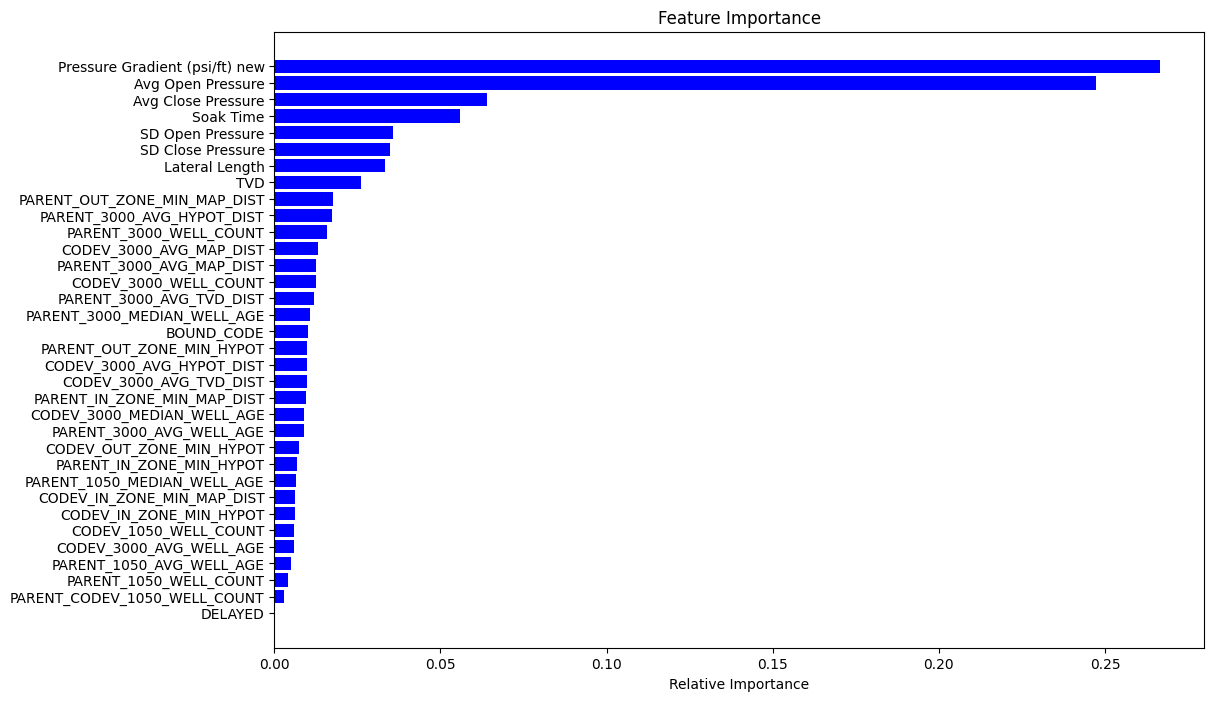

In [17]:
filled_in_apd = df['Avg Pump Difference'].fillna(df['Avg Pump Difference'].mean())
X = df.drop(columns=['Well ID', 'Avg Pump Difference', 'Area', 'Fluid System', 'Development Strategy', 'CODEV_POSITION', 'CODEV_FORMATION_POSITION'])
y = filled_in_apd

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.15, random_state=42)

# Create a RandomForestRegressor
randreg = RandomForestRegressor(random_state=42)

# Fit the model
randreg.fit(X_train, y_train)

# Feature importances
features = X.columns
importances = randreg.feature_importances_
indices = np.argsort(importances)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

In [18]:
# Given rf, we decided to remove the below columns as they had high correlation and similar importance
cols_to_drop = ['Well ID',
                'Area',
                'PARENT_CODEV_1050_WELL_COUNT',
                'PARENT_1050_MEDIAN_WELL_AGE',
                'PARENT_3000_AVG_HYPOT_DIST',
                'PARENT_3000_AVG_MAP_DIST',
                'PARENT_3000_MEDIAN_WELL_AGE',
                'CODEV_3000_AVG_TVD_DIST',
                'CODEV_3000_MEDIAN_WELL_AGE',
                'PARENT_OUT_ZONE_MIN_MAP_DIST',
                'CODEV_3000_AVG_MAP_DIST',
                'PARENT_IN_ZONE_MIN_MAP_DIST',
                'CODEV_IN_ZONE_MIN_MAP_DIST',
                'PARENT_CODEV_1050_WELL_COUNT',
                'CODEV_POSITION']
df = df.drop(columns=cols_to_drop)

#### Running the linear regression
We tested multiple encoders for our categorical data, and different models to determine best model for this prediction.

In [19]:
# create backup copy of df and change df after by removing the 15 missing apd rows
df2 = df.copy()

In [20]:
# delete the 15 rows of na apd
df2 = df2.dropna()

# Label encode the 'Category' column
label_encoder = LabelEncoder()
categorical_columns = ['BOUND_CODE', 'Fluid System', 'CODEV_FORMATION_POSITION', 'Development Strategy']
df2[categorical_columns] = df2[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))
X = df2.drop('Avg Pump Difference', axis=1)
y = df2['Avg Pump Difference']

## Linear Regression

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
y_pred = linear_reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print("Coefficients:", linear_reg_model.coef_)
print("Intercept:", linear_reg_model.intercept_)

Mean Squared Error: 319.05815892045666
R-squared: 0.3461019968691301
Coefficients: [-3.36581384e-04  1.91404996e+00  6.55695390e-03  1.21554198e+00
 -1.11573324e+01 -7.08072083e-02 -7.71861682e+00 -7.37697507e-04
 -5.24870511e-04  3.11564382e-03 -7.06117941e-01  1.85993623e-04
 -4.40416857e-03  3.42154470e-01 -6.61526118e-04  3.52601751e-04
  1.48695071e+00  5.39993129e-03  2.21663706e-01 -3.14383181e-01
 -2.99369011e+02  1.24524445e-02 -1.53126416e-02  3.60585424e-04
 -6.34536797e-03  1.09995790e-02]
Intercept: 178.6600803067485


## Lasso Regression

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print("Coefficients:", lasso_model.coef_)
print("Intercept:", lasso_model.intercept_)

Mean Squared Error: 365.7006054093299
R-squared: 0.250510012249748
Coefficients: [-1.10810175e-04  2.97602344e+00  8.04778953e-03 -0.00000000e+00
 -0.00000000e+00 -2.26386620e-01 -0.00000000e+00 -6.36492504e-04
  5.74313769e-04  2.90881120e-03 -0.00000000e+00 -4.85164594e-04
 -4.12955706e-03  3.89432010e-01 -3.23738256e-04 -1.60537327e-04
  0.00000000e+00 -1.12783588e-04  7.71070743e-03  4.61463663e-01
 -0.00000000e+00  1.03069020e-02 -2.75452634e-02 -3.34834507e-05
 -6.35142782e-03  8.03109509e-03]
Intercept: 39.92727257790125


## Ridge Regression

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print("Coefficients:", ridge_model.coef_)
print("Intercept:", ridge_model.intercept_)

Mean Squared Error: 346.26217431665197
R-squared: 0.2903483643498992
Coefficients: [-2.38247143e-04  3.53773295e+00  7.60694216e-03 -8.93670117e-01
 -8.71184040e+00 -2.22501013e-01 -7.06517427e+00 -5.69007359e-04
 -2.49330871e-04  3.21129003e-03  2.67242925e-02 -2.14564982e-04
 -4.02464417e-03  4.66368739e-01 -1.84007938e-04  2.66700091e-05
  1.35087940e+00  1.23773422e-03  9.11565256e-02  4.20310698e-01
 -3.71811192e+01  1.19134812e-02 -2.55636938e-02 -1.77766349e-03
 -5.92590086e-03  8.65086132e-03]
Intercept: 61.405321932278994


## Decision Tree Regression

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 481.69232238805967
R-squared: 0.012789239432834942


## Random Forest Regression

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)   
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 256.7125531937314
R-squared: 0.4738770308210243


In [30]:

#KNN
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN regressor with the desired number of neighbors (e.g., 3)
knn_regressor = KNeighborsRegressor(n_neighbors=3)

# Train the KNN regressor on the training data
knn_regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_knn = knn_regressor.predict(X_test)

# Evaluate the performance of the KNN regressor
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Print the results
print(f"Mean Squared Error (KNN): {mse_knn}")
print(f"R-squared (KNN): {r2_knn}")


Mean Squared Error (KNN): 564.3456668325041
R-squared (KNN): -0.1566057607363487


In [38]:
# Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have X_train, X_test, y_train, y_test from the previous code

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize PCA with the desired number of components (e.g., 2)
pca = PCA(n_components=2)

# Fit and transform the training data
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform the testing data using the same PCA model
X_test_pca = pca.transform(X_test_scaled)

# Initialize the KNN regressor with the desired number of neighbors (e.g., 3)
knn_regressor_pca = KNeighborsRegressor(n_neighbors=3)

# Train the KNN regressor on the PCA-transformed training data
knn_regressor_pca.fit(X_train_pca, y_train)

# Make predictions on the PCA-transformed testing data
y_pred_knn_pca = knn_regressor_pca.predict(X_test_pca)

# Evaluate the performance of the KNN regressor with PCA
mse_knn_pca = mean_squared_error(y_test, y_pred_knn_pca)
r2_knn_pca = r2_score(y_test, y_pred_knn_pca)

# Print the results
print(f"Mean Squared Error (KNN with PCA): {mse_knn_pca}")
print(f"R-squared (KNN with PCA): {r2_knn_pca}")


Mean Squared Error (KNN with PCA): 520.8582023217248
R-squared (KNN with PCA): -0.0674797960500404


In [46]:
# Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have X_train, X_test, y_train, y_test from the previous code

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize PCA with the desired number of components (e.g., 2)
pca = PCA(n_components=3)

# Fit and transform the training data
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform the testing data using the same PCA model
X_test_pca = pca.transform(X_test_scaled)

# Your regression model (for example, RandomForestRegressor)
# Replace the following lines with the regression model of your choice
from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor with your preferred parameters
regression_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the regression model on the PCA-transformed training data
regression_model.fit(X_train_pca, y_train)

# Make predictions on the PCA-transformed testing data
y_pred_pca = regression_model.predict(X_test_pca)

# Evaluate the performance of the regression model with PCA
mse_pca = mean_squared_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)

# Print the results
print(f"Mean Squared Error (PCA + Regression): {mse_pca}")
print(f"R-squared (PCA + Regression): {r2_pca}")


Mean Squared Error (PCA + Regression): 282.12249558567163
R-squared (PCA + Regression): 0.42180028517070367
